In [2]:
import matlab.engine
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cd "D:\git_repo\NET\timeSeriesViewer\dataRecordingObjects\"

D:\git_repo\NET\timeSeriesViewer\dataRecordingObjects


In [4]:
eng = matlab.engine.start_matlab() #the engine is set to the current path
# eng.pwd() # make sure good path

In [5]:
bin_fullpath = r'F:\experiment1_109.raw.bin' #NOTE: meta file shoud be with the bin file at the same folder
bin_obj = eng.binaryRecording(bin_fullpath) #NOTE- if faile - make sure you created eng in the rigth path

In [6]:
startTime_ms = matlab.double([100]) #crate a matlab array (numbers should be doubles)
channels = matlab.double(range(1,2))
matlab_mat_data = eng.getData(bin_obj, channels, startTime_ms, 3600000.0)

In [7]:
py_mat = np.array(matlab_mat_data) #convert the result to python object

In [8]:
py_mat.shape

(1, 1, 72000000)

In [8]:
# dim explain
# py_mat[x][y][z]
# x- channel (acording to the order given to getData)
# y- start_time (acording to the order given to getData) 
# z- voltage (acording to the window given to getData) 

In [9]:
pc_pymat = py_mat[0][0]

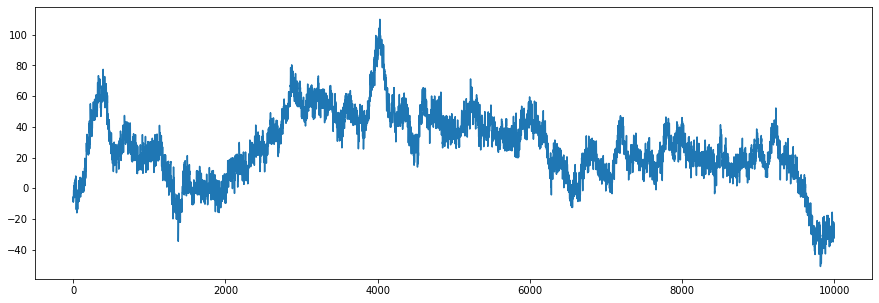

In [20]:
# plt.plot(pc_pymat)
plt.figure(figsize=(15,5))
plt.plot(pc_pymat[10000:20000])

In [53]:
old_val = pc_pymat[10000]
curr_val = 0
process = [old_val]
for i in range(10000,360000):
    curr_val = pc_pymat[i]
    diff = curr_val - old_val
    process.append(diff)
    old_val = curr_val

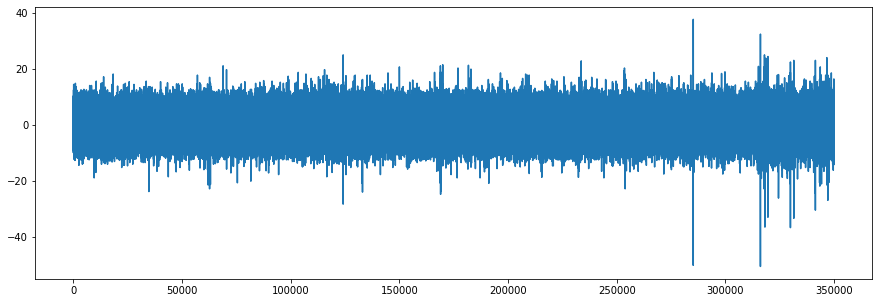

In [54]:
plt.figure(figsize=(15,5))
# plt.plot(process[600000:700000])
plt.plot(process)

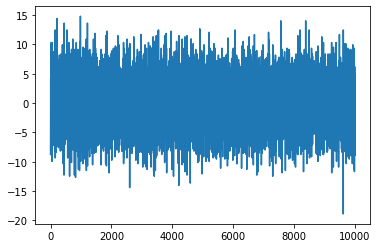

In [46]:
plt.plot(process[:10000])

In [9]:
## leavi-process

In [51]:
stochastic_process = [0]
white_noise = []
stochastic_process = [0]
# for i in range(10000,72000000):
#     white_noise.append(np.random.uniform(low=-1,high=1))
    
for i in range(10000):
    stochastic_process.append(stochastic_process[-1]+np.random.uniform(low=-5,high=5))
#     stochastic_process.append(stochastic_process[-1]+np.random.randn())


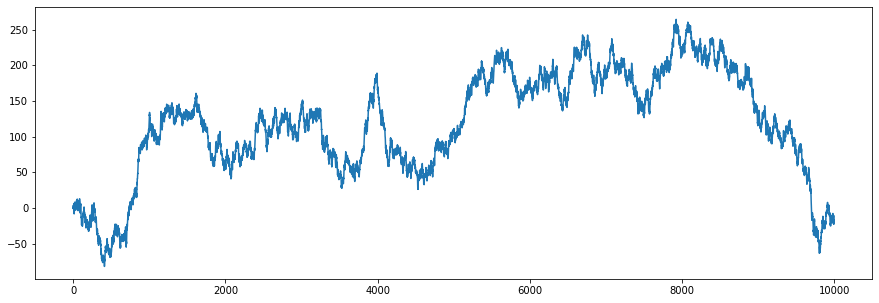

In [52]:
plt.figure(figsize=(15,5))
plt.plot(stochastic_process)

In [42]:
old_val = stochastic_process[0]
curr_val = 0
process = [old_val]
for i in range(1,len(stochastic_process)):
    curr_val = stochastic_process[i]
    diff = curr_val - old_val
    process.append(diff)
    old_val = curr_val

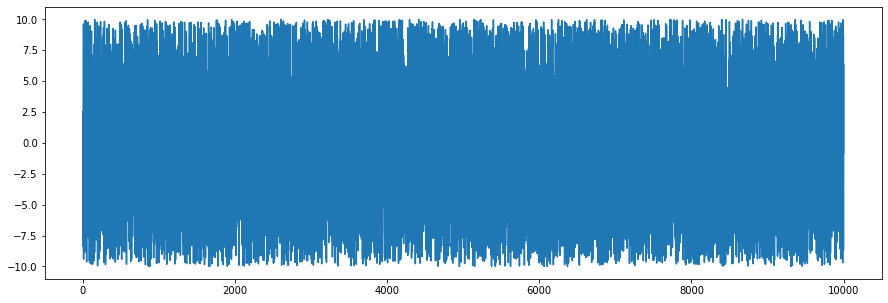

In [43]:
plt.figure(figsize=(15,5))
# plt.plot(process[600000:700000])
plt.plot(process)